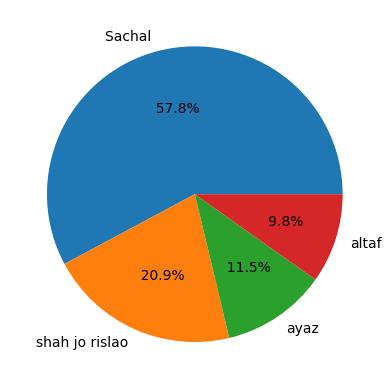

In [9]:
import matplotlib.pyplot as plt

Text_Content  = [105000,38000,20800,17800]
Types = ["Sachal ","shah jo rislao","ayaz","altaf"]
exp = [0,0,0,0]
plt.pie(Text_Content,labels=Types,explode=exp,autopct='%6.1f%%')
plt.show()

In [11]:
# LInear Reg
# Initialize and train the Decision Tree modelimport pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

# Read and merge Excel files
file_paths = ['/content/merged_file.xlsx']

merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_excel(file_path)
    merged_data = merged_data.append(data, ignore_index=True)

# Save merged data to a new Excel file
merged_data.to_excel('Decision.xlsx', index=False)

# Assuming df is your DataFrame
features_column = 'Text Content'
target_column = 'Category'

# Check if columns are present in the DataFrame
if set([features_column, target_column]).issubset(merged_data.columns):
    features = merged_data[features_column]
    target = merged_data[target_column]

    # Encode the target labels
    label_encoder = LabelEncoder()
    y_numerical = label_encoder.fit_transform(target)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(features)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_numerical, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linear_regression_model.predict(X_test)



# Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)

# Optionally, print features and target
    print("Features:\n", features)
    print("Target:\n", target)

# Save the trained model
    joblib.dump(linear_regression_model, 'linear_regression_model.pkl')



else:
    print("Error: Columns not found in the DataFrame.")




<ipython-input-11-ce88f29659f6>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)


Mean Absolute Error: 0.20327946662791374
Features:
 0                                     ﻛﻼم ﺳﻨﮅي ﺟﻮ ﺳﺎﺋﻴﻦ ﺳﭽﻞ
1                                     ﻛﻼم ﺳﻨﮅي ﺟﻮ ﺳﺎﺋﻴﻦ ﺳﭽﻞ
2                                             ﺗﺮﺗﻴﺐ ﺳﺮ ﻧﺌﻴﻦ
3                                          اﻧﺼﺎري ﻋﻠﻲ ﻋﺜﻤﺎن
4                                                ﭜﺮﮘﮍي ﻣﺎﺟﺪ
                                ...                        
159341                                                شاعري
159342                                             شيخ اياز
159343                                              ڪمپوزهگ
159344                                     عبداللطيف اهصاري
159345    هن ڪتاب جا سمورا حق واسطا سنڌي ادبي سنگت شاخ س...
Name: Text Content, Length: 159346, dtype: object
Target:
 0         Sachal jo kalam 
1         Sachal jo kalam 
2         Sachal jo kalam 
3         Sachal jo kalam 
4         Sachal jo kalam 
                ...       
159341         Ayaz Shaikh
159342         Ayaz Shaikh
159343       

<ipython-input-12-dc401aa580b3>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)


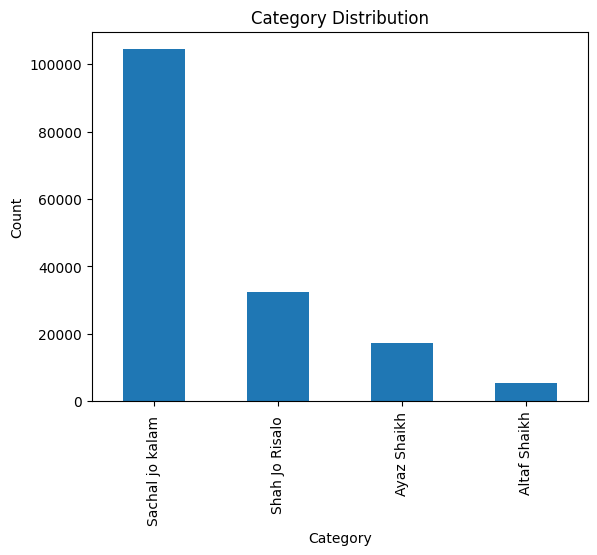

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


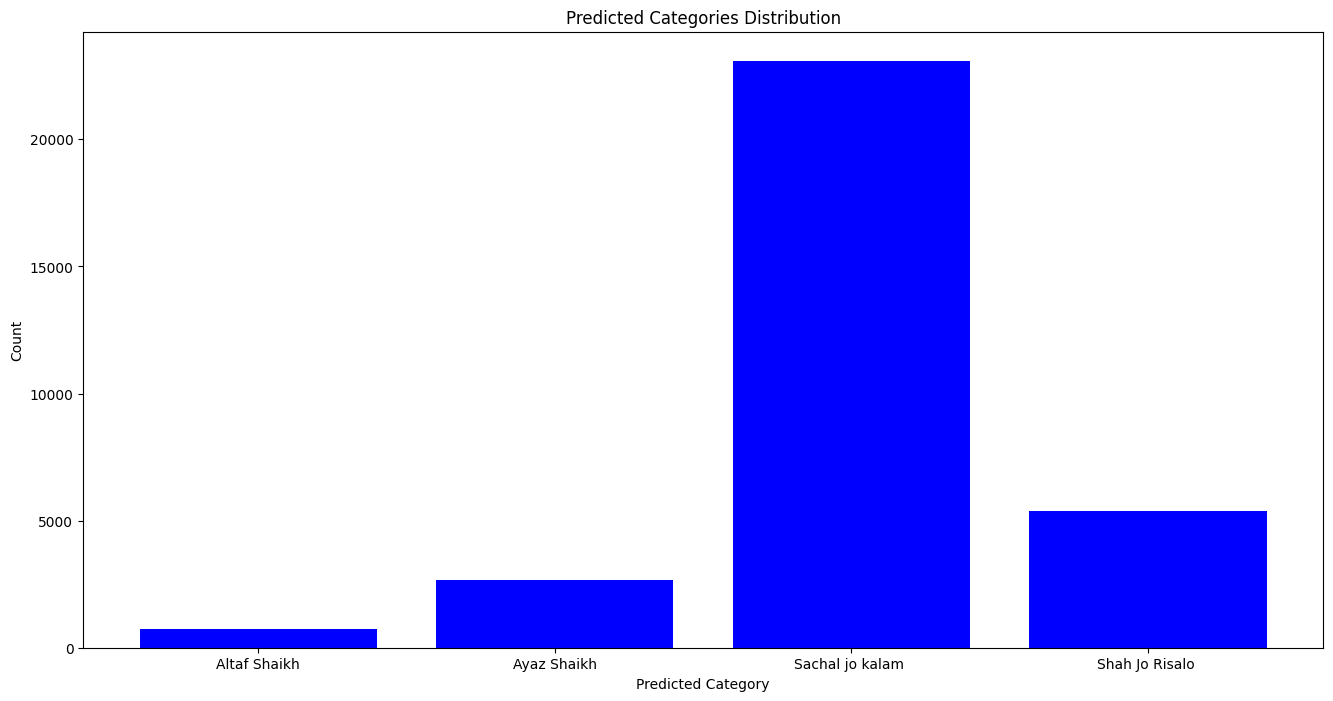


Sample Features:
 153571                                ڄق هم کي
103066              ﺳﭽ ﮀﮇﻨﺪ ﻛﻴﻦ ﭘﺎﻧﻬﺠﻮ آ ﺳﻨﺪان
89917                       ﺣﻘﻴﻘﺖ رﺳﺎﻟﻮ ﺟﻮ ﺳﭽﻞ
12969     ا رﻣﺎن ا ﮬﻮﺋ ﻲ آھ ا ﭼ ﻲ آ ء ﭘﻴﺲ ﻛﺎﭤﻲ
33045                                      ﻲﭼا
Name: Text Content, dtype: object

Sample Target:
 153571         Ayaz Shaikh
103066    Sachal jo kalam 
89917     Sachal jo kalam 
12969     Sachal jo kalam 
33045     Sachal jo kalam 
Name: Category, dtype: object
Classification Report:
                   precision    recall  f1-score   support

    Altaf Shaikh       0.91      0.62      0.74      1100
     Ayaz Shaikh       0.99      0.77      0.86      3424
Sachal jo kalam        0.88      0.98      0.93     20735
 Shah Jo Risalo        0.91      0.74      0.82      6611

        accuracy                           0.90     31870
       macro avg       0.92      0.78      0.84     31870
    weighted avg       0.90      0.90      0.89     31870



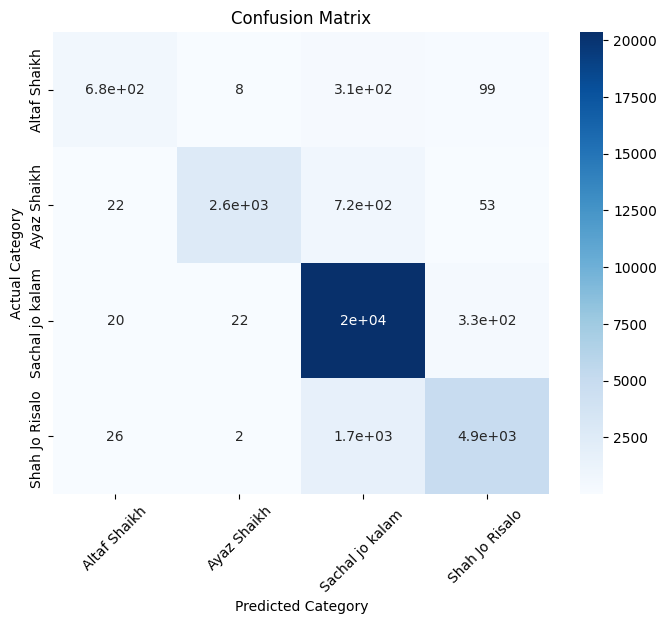

In [12]:
  # Train a logistic regression model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import numpy as np

# Read and merge Excel files
file_paths = ['/content/merged_file.xlsx']
merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_excel(file_path)
    merged_data = merged_data.append(data, ignore_index=True)

# Save merged data to a new Excel file
merged_data.to_excel('logistic.xlsx', index=False)

# Display category distribution
category_distribution = merged_data['Category'].value_counts()
category_distribution.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Train and evaluate the model
def train_evaluate_model(X_train, X_test, y_train, y_test):
    try:
        # Vectorize the text data using TF-IDF
        vectorizer = TfidfVectorizer()
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)

        # Train a logistic regression model
        logistic_reg_model = LogisticRegression()
        logistic_reg_model.fit(X_train_tfidf, y_train)

        # Make predictions on the test set
        y_pred = logistic_reg_model.predict(X_test_tfidf)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Visualize the predicted categories
        category_count = pd.Series(y_pred).value_counts().sort_index()
        plt.figure(figsize=(16, 8))
        plt.bar(category_count.index, category_count.values, color='blue')
        plt.xlabel('Predicted Category')
        plt.ylabel('Count')
        plt.title('Predicted Categories Distribution')
        plt.show()

        # Save the trained model to disk
        joblib.dump(logistic_reg_model, 'logistic_regression_model.joblib')

        # Display sample features and target values
        print("\nSample Features:\n", X_train.head())
        print("\nSample Target:\n", y_train.head())

        # Print classification report and confusion matrix
        print('Classification Report:\n', classification_report(y_test, y_pred))

        # Correctly construct the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Add labels to the matrix
        labels = sorted(set(list(y_test) + list(y_pred)))
        plt.figure(figsize=(8, 6))
        ax = plt.gca()

        # Generate heatmap from confusion matrix
        sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')

        # Set labels and title
        ax.set_title('Confusion Matrix')
        ax.set_xlabel('Predicted Category')
        ax.set_ylabel('Actual Category')
        ax.set_xticks(np.arange(len(labels)) + 0.5, labels=labels, rotation=45)
        ax.set_yticks(np.arange(len(labels)) + 0.5, labels=labels)

        # Show the plot
        plt.show()

        # Save the trained model
        joblib.dump(logistic_reg_model, 'logistic_regression_model.pkl')

    except Exception as e:
        print(f"Error during model training and evaluation: {e}")

# Assuming your DataFrame is named 'merged_data'
features_column = 'Text Content'
target_column = 'Category'

# Parameterize constants
test_size = 0.2
random_state = 42

# Check if columns exist in the DataFrame
if set([features_column, target_column]).issubset(merged_data.columns):
    features = merged_data[features_column]
    target = merged_data[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state)

    # Train and evaluate the model
    train_evaluate_model(X_train, X_test, y_train, y_test)

else:
    print("Error: Columns not found in the DataFrame.")


<ipython-input-13-60fc09c6537c>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)


Accuracy: 0.9057106997176028

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.69      0.75      1100
           1       0.96      0.80      0.88      3424
           2       0.91      0.97      0.94     20735
           3       0.88      0.79      0.83      6611

    accuracy                           0.91     31870
   macro avg       0.89      0.81      0.85     31870
weighted avg       0.91      0.91      0.90     31870



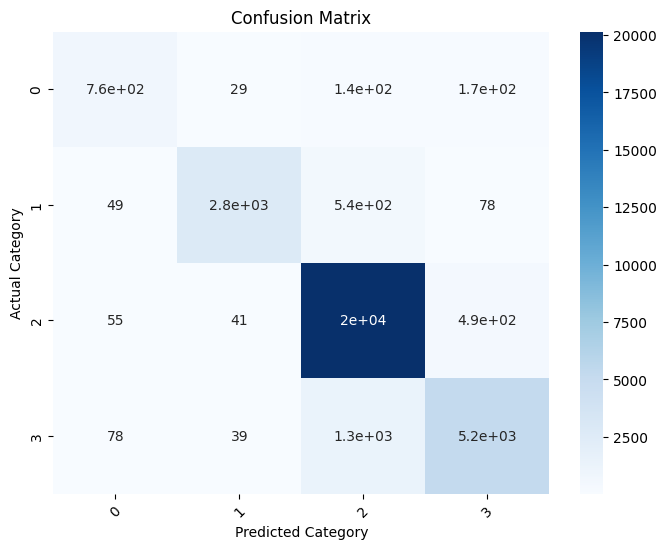

Features:
 0                                     ﻛﻼم ﺳﻨﮅي ﺟﻮ ﺳﺎﺋﻴﻦ ﺳﭽﻞ
1                                     ﻛﻼم ﺳﻨﮅي ﺟﻮ ﺳﺎﺋﻴﻦ ﺳﭽﻞ
2                                             ﺗﺮﺗﻴﺐ ﺳﺮ ﻧﺌﻴﻦ
3                                          اﻧﺼﺎري ﻋﻠﻲ ﻋﺜﻤﺎن
4                                                ﭜﺮﮘﮍي ﻣﺎﺟﺪ
                                ...                        
159341                                                شاعري
159342                                             شيخ اياز
159343                                              ڪمپوزهگ
159344                                     عبداللطيف اهصاري
159345    هن ڪتاب جا سمورا حق واسطا سنڌي ادبي سنگت شاخ س...
Name: Text Content, Length: 159346, dtype: object
Target:
 0         Sachal jo kalam 
1         Sachal jo kalam 
2         Sachal jo kalam 
3         Sachal jo kalam 
4         Sachal jo kalam 
                ...       
159341         Ayaz Shaikh
159342         Ayaz Shaikh
159343         Ayaz Shaikh
159344         Ayaz Shaikh


In [13]:
# Initialize and train the Decision Tree modelimport pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

# Read and merge Excel files
file_paths = ['/content/merged_file.xlsx']

merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_excel(file_path)
    merged_data = merged_data.append(data, ignore_index=True)

# Save merged data to a new Excel file
merged_data.to_excel('Decision.xlsx', index=False)

# Assuming df is your DataFrame
features_column = 'Text Content'
target_column = 'Category'

# Check if columns are present in the DataFrame
if set([features_column, target_column]).issubset(merged_data.columns):
    features = merged_data[features_column]
    target = merged_data[target_column]

    # Encode the target labels
    label_encoder = LabelEncoder()
    y_numerical = label_encoder.fit_transform(target)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(features)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_numerical, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree model
    decision_tree_model = DecisionTreeClassifier(random_state=42)
    decision_tree_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = decision_tree_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Print classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = sorted(set(list(y_test) + list(y_pred)))
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Category')
    ax.set_ylabel('Actual Category')
    ax.set_xticks(np.arange(len(labels)) + 0.5, labels=labels, rotation=45)
    ax.set_yticks(np.arange(len(labels)) + 0.5, labels=labels)
    plt.show()

    # Optionally, print features and target
    print("Features:\n", features)
    print("Target:\n", target)

    # Save the trained model
    joblib.dump(decision_tree_model, 'decision_tree_model.pkl')
else:
    print("Error: Columns not found in the DataFrame.")



In [ ]:
# Build the Random forest IN ML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier  # Add this import statement
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

# Read and merge Excel files
file_paths = ['/content/merged_file.xlsx']

merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_excel(file_path)
    merged_data = merged_data.append(data, ignore_index=True)

# Save merged data to a new Excel file
merged_data.to_excel('Random.xlsx', index=False)

# Assuming df is your DataFrame
features_column = 'Text Content'
target_column = 'Category'

if set([features_column, target_column]).issubset(merged_data.columns):
    features = merged_data[features_column]
    target = merged_data[target_column]

    label_encoder = LabelEncoder()
    y_numerical = label_encoder.fit_transform(target)

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(X, y_numerical, test_size=0.2, random_state=42)

    random_forest_model = RandomForestClassifier(random_state=42)
    random_forest_model.fit(X_train, y_train)

    y_pred = random_forest_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = sorted(set(list(y_test) + list(y_pred)))
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Category')
    ax.set_ylabel('Actual Category')
    ax.set_xticks(np.arange(len(labels)) + 0.5, labels=labels, rotation=45)
    ax.set_yticks(np.arange(len(labels)) + 0.5, labels=labels)
    plt.show()
    print("Features:\n", features)
    print("Target:\n", target)
else:
    print("Error: Columns not found in the DataFrame.")


In [16]:
# Build the machine learning model (e.g., Random Forest)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read and merge Excel files
file_paths = ['/content/Sachal_jo_kalam_Scraping_data.xlsx', '/content/SHAH_jo_risalo_Scraping_data.xlsx', '/content/Ayaz_shaikh_Scraping_data.xlsx', '/content/Altaf_shaikh_Scraping_data.xlsx']

merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_excel(file_path)
    merged_data = merged_data.append(data, ignore_index=True)

# Check for missing values
if merged_data.isnull().values.any():
    print("Error: Missing values in the DataFrame.")
    exit()

# Save merged data to a new Excel file
merged_data.to_excel('machine.xlsx', index=False)

# Train-test split
features_column = 'Text Content'
target_column = 'Category'

if set([features_column, target_column]).issubset(merged_data.columns):
    features = merged_data[features_column]
    target = merged_data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Vectorization
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    # Label encoding
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # Model training
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Model evaluation
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = sorted(set(list(y_test) + list(y_pred)))
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Category')
    ax.set_ylabel('Actual Category')
    ax.set_xticks(np.arange(len(labels)) + 0.5, labels=labels, rotation=45)
    ax.set_yticks(np.arange(len(labels)) + 0.5, labels=labels)
    plt.show()

    print("Features:\n", features)
    print("Target:\n", target)
else:
    print("Error: Columns not found in the DataFrame.")



<ipython-input-16-46812f7e7ee3>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
<ipython-input-16-46812f7e7ee3>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
<ipython-input-16-46812f7e7ee3>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
<ipython-input-16-46812f7e7ee3>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)


KeyboardInterrupt: ignored